# Author : Priti vijay Ghugal
## Task 1 : Prediction using supervised ML
### Problem Statement : Predict the expected percentage of marks on the basis of student's no.of study hours
### In this dataset we have two columns study hours and scores
## The Spark Foundation
### Graduate Rotational Internship Program(GRIP) June 2021 Batch

## Data Scince And Business Analytics Task

#### Let us first import necessary library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Read and load the data

In [2]:
df = pd.read_csv("student_scores - student_scores.csv")

####  Check first five rows of data

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.shape

(25, 2)

#### dataset contain 25 rows and 2 columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


#### Describe function shows the count,mean,standard deviation,percentile,minimun and maximum value of dataset

In [7]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

#### Dataset dont have any null values

In [8]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


#### this shows corelation of feature

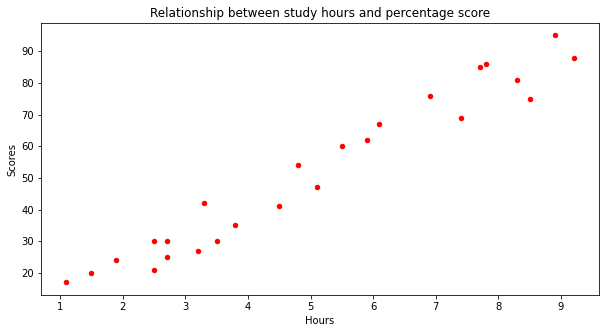

In [9]:
df.plot(kind = 'scatter', x= 'Hours', y = 'Scores',color = 'red',figsize =(10,5))
plt.title("Relationship between study hours and percentage score")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()


#### Here we can see that both the features are positively correlated means as study hours increases percentage also increases

### now separate the dependent and independent feature

In [10]:
feature = df[['Hours']]
target = df['Scores']

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#### Split the data in train and test

In [12]:
X_train,X_test,y_train,y_test = train_test_split(feature,target,test_size = 0.2,random_state = 123)

In [13]:
print("Shape of training data : ",X_train.shape,y_train.shape)
print("Shape of testing data : ",X_test.shape,y_test.shape)

Shape of training data :  (20, 1) (20,)
Shape of testing data :  (5, 1) (5,)


#### Here we have 20 datapoint  which we have going to train and 5 data points we test on the basis of our training

#### Apply algo and train the model

In [14]:
lr = LinearRegression()
lr.fit(X_train,y_train)
print("intercept",lr.intercept_)

print("coeficient",lr.coef_)

intercept 2.6953889223457423
coeficient [9.60171878]


#### Now training is completed  and ready to test

In [15]:
y_pred = lr.predict(X_test)

In [16]:
y_pred

array([17.09796709, 48.78363906, 39.18192028, 61.26587347, 88.15068605])

In [17]:
df2 = pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
df2

,Actual,Predicted
5,20,17.097967
21,54,48.783639
22,35,39.181920
18,67,61.265873
15,95,88.150686


#### here the dataframe showing actual and predicted score 

In [18]:
y_pred.shape

(5,)

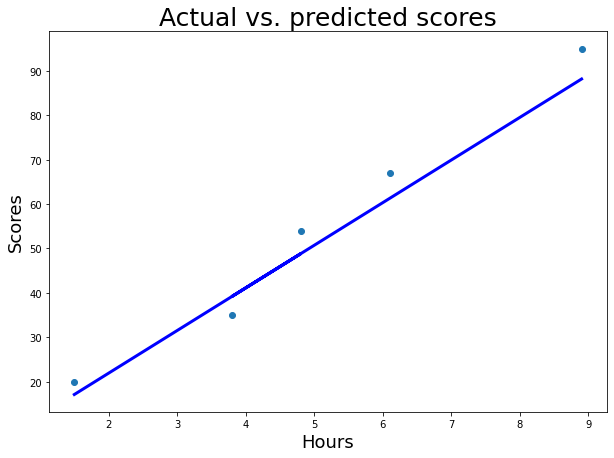

In [19]:
plt.figure(figsize=(10,7))
plt.title("Actual vs. predicted scores",fontsize=25)
plt.xlabel("Hours",fontsize=18)
plt.ylabel("Scores", fontsize=18)
plt.scatter(x=X_test,y=y_test)
plt.plot(X_test, y_pred, color='blue', linewidth=3)

#### this show difference between our actual score and predicted score... this line shows predicted value and this small circle shows actual value of scores

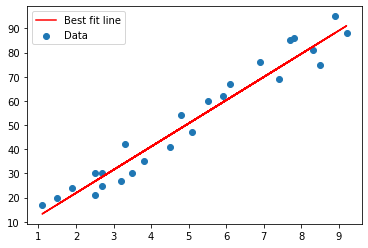

In [20]:
line = lr.coef_*feature+lr.intercept_
plt.scatter(feature,target,label='Data')
plt.plot(feature,line,label = 'Best fit line',color ='r')
plt.legend()

#### This shows the best fit line where we get minimum error

In [21]:
from sklearn import metrics


In [22]:
print("Accuracy on test data : ",lr.score(X_test,y_test))
print("Accuracy on training data : ",lr.score(X_train,y_train))

Accuracy on test data :  0.9605221627526419
Accuracy on training data :  0.9493255692526655


#### getting good accuracy on training and testing data

In [23]:
print("Mean absolute error (MAE):", metrics.mean_absolute_error(y_test,y_pred))
print("Mean square error (MSE):", metrics.mean_squared_error(y_test,y_pred))
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean absolute error (MAE): 4.9767509236804015
Mean square error (MSE): 26.582796488881087
Root mean square error (RMSE): 5.15585070467339


#### this is our final step where we evaluate the performance of algorithem.here different errors have been calculated using different matrices like Mean absolute error,Mean squared error,root mean squared error and r_squared value

In [24]:
r_squared = round(metrics.r2_score(y_test,y_pred),3)
print("R-squared value of predictions:",r_squared)

R-squared value of predictions: 0.961


In [25]:
adjusted_r_squared =round( 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-feature.shape[1]-1),3)
print("Adjusted R-squared value of predictions:",adjusted_r_squared)

Adjusted R-squared value of predictions: 0.948


<AxesSubplot:>

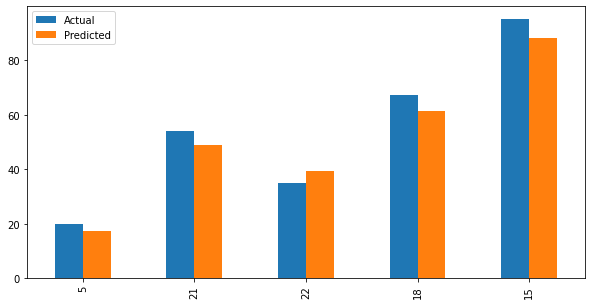

In [26]:
df2.plot(kind ='bar',figsize = (10,5))

#### Here we plot actual and predicted values of test data

## Making prediction
### now we predict our own data

In [27]:
hour = [[9.25]]
own_prediction =lr.predict(hour)
print("no. of study Hours : ",hour)
print("Expected percentage score : ",own_prediction)

no. of study Hours :  [[9.25]]
Expected percentage score :  [91.51128762]


### if the student studied 9.25 hours .. student expect 91% of marks

In [28]:
hour = [[2.45]]
own_prediction =lr.predict(hour)
print("no. of study Hours : ",hour)
print("Expected percentage score : ",own_prediction)

no. of study Hours :  [[2.45]]
Expected percentage score :  [26.21959993]


#### this student which studied only 2.45 hours his expected score is 26%
